# 資料準備

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

train images     : (55000, 784) labels: (55000, 10)
validation images: (5000, 784)  labels: (5000, 10)
test images      : (10000, 784) labels: (10000, 10)


# 建立模型

In [3]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
# 建立輸入層 x 

In [5]:
x = tf.placeholder("float", [None, 784])

In [6]:
# 建立隱藏層h1

In [7]:
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  


In [8]:
# 建立輸出層

In [9]:
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)


# 定義訓練方式

In [10]:
#建立訓練資料label真實值 placeholder

In [11]:
y_label = tf.placeholder("float", [None, 10])

In [12]:
#定義loss function

In [13]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
#選擇optimizer

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

# 定義評估模型的準確率

In [16]:
#計算每一筆資料是否正確預測

In [17]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [18]:
#將計算預測正確結果，加總平均

In [19]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 開始訓練

In [20]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 6.970646858  Accuracy= 0.8322
Train Epoch: 02 Loss= 4.248607635  Accuracy= 0.8862
Train Epoch: 03 Loss= 3.233777761  Accuracy= 0.9034
Train Epoch: 04 Loss= 2.631146908  Accuracy= 0.9178
Train Epoch: 05 Loss= 2.236613750  Accuracy= 0.9226
Train Epoch: 06 Loss= 2.028581142  Accuracy= 0.9292
Train Epoch: 07 Loss= 1.785742164  Accuracy= 0.9348
Train Epoch: 08 Loss= 1.663322806  Accuracy= 0.936
Train Epoch: 09 Loss= 1.558380127  Accuracy= 0.9374
Train Epoch: 10 Loss= 1.531017184  Accuracy= 0.9374
Train Epoch: 11 Loss= 1.453670263  Accuracy= 0.942
Train Epoch: 12 Loss= 1.380712748  Accuracy= 0.941
Train Epoch: 13 Loss= 1.407399654  Accuracy= 0.9408
Train Epoch: 14 Loss= 1.329992533  Accuracy= 0.946
Train Epoch: 15 Loss= 1.255510569  Accuracy= 0.9474
Train Finished takes: 9.738319158554077


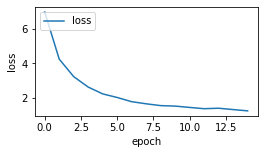

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

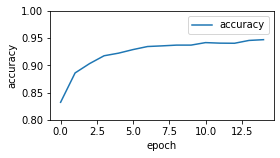

In [23]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 評估模型準確率

In [24]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

Accuracy: 0.9413


# 進行預測

In [25]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [26]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 2, 5, 9])

In [27]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

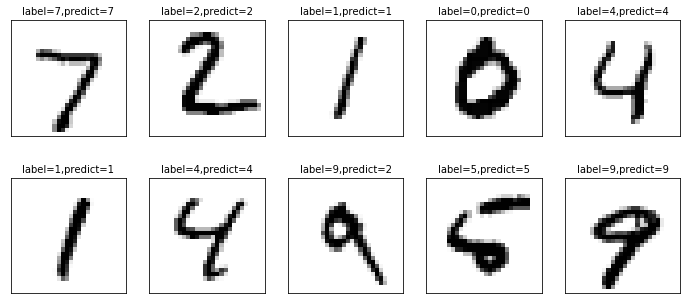

In [28]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,0)

In [29]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [30]:
y_predict_Onehot[8]

array([-176.04555   , -110.43341   ,  -50.265606  ,  -94.60379   ,
        -13.942092  ,   37.498108  ,    0.83211666,  -78.211395  ,
        -43.109386  , -102.27917   ], dtype=float32)

# 找出預測錯誤

In [31]:
for i in range(400):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(mnist.test.labels[i]),
              "predict=",prediction_result[i])

i=7   label= 9 predict= 2
i=62   label= 9 predict= 5
i=92   label= 9 predict= 8
i=116   label= 4 predict= 9
i=149   label= 2 predict= 3
i=151   label= 9 predict= 5
i=217   label= 6 predict= 5
i=247   label= 4 predict= 2
i=259   label= 6 predict= 0
i=274   label= 9 predict= 3
i=320   label= 9 predict= 7
i=321   label= 2 predict= 7
i=324   label= 0 predict= 8
i=341   label= 6 predict= 5
i=359   label= 9 predict= 4
i=381   label= 3 predict= 7
i=386   label= 6 predict= 5


In [32]:
#sess.close()